<a href="https://colab.research.google.com/github/XyzoexR/TBI-Biomarker-Prediction/blob/main/Analyzing_the_npa_and_ppa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the Excel file (adjust the path if necessary)
file_path = '/content/TBI Sample Concentration Summary_20240923lm.xlsx'
excel_data = pd.ExcelFile(file_path)

In [ ]:
# Check the sheet names to verify the structure
print(excel_data.sheet_names)

['TBI ELISA-PCR Summary', 'BBS 5th Shipment to Lumira']


In [ ]:
# Load the data from the relevant sheet
tbi_data = excel_data.parse('TBI ELISA-PCR Summary')

In [ ]:
# Inspect the first few rows of the data to understand its structure
print(tbi_data.head())

  Unnamed: 0   Unnamed: 1             Unnamed: 2       Unnamed: 3  \
0     Item #  Sample name                 source  Number of vials   
1         10         D 25  non-study TBI patient                1   
2         11         D 26  non-study TBI patient                1   
3         12         D 27  non-study TBI patient                1   
4         13         D 28  non-study TBI patient                1   

             Unnamed: 4  BBX Conc. (ng/mL) Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0  Amount (mL) per vial               GFAP       NRGN        ST2       BDNF   
1                0.5 mL              0.264      0.125         39         25   
2                  1 mL              1.064      0.066        184         15   
3                  1 mL               1.57      0.096         48         21   
4                  1 mL              0.062      0.041         45         14   

  Elisa-PCR Meas. Conc. (ng/mL)  Unnamed: 10 Unnamed: 11 Unnamed: 12  \
0                           GFAP      

In [ ]:
# Now clean the data by selecting relevant columns
columns_of_interest = [
    'Unnamed: 1', 'Unnamed: 2', ' BBX Conc. (ng/mL)', 'Unnamed: 6',
    'Unnamed: 7', 'Unnamed: 8', 'Elisa-PCR Meas. Conc. (ng/mL) ',
    'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17',
    'Unnamed: 18', 'Unnamed: 19'
]

# Renaming the columns for clarity
cleaned_data = tbi_data[columns_of_interest].rename(columns={
    'Unnamed: 1': 'Sample Name',
    'Unnamed: 2': 'Source',
    ' BBX Conc. (ng/mL)': 'BBX_GFAP',
    'Unnamed: 6': 'BBX_NRGN',
    'Unnamed: 7': 'BBX_ST2',
    'Unnamed: 8': 'BBX_BDNF',
    'Elisa-PCR Meas. Conc. (ng/mL) ': 'ELISA_PCR_GFAP',
    'Unnamed: 10': 'ELISA_PCR_NRGN',
    'Unnamed: 11': 'ELISA_PCR_ST2',
    'Unnamed: 12': 'ELISA_PCR_BDNF',
    'Unnamed: 16': 'BBX_NPA',
    'Unnamed: 17': 'ELISA_PCR_PPA',
    'Unnamed: 18': 'BBX_Cutoff',
    'Unnamed: 19': 'ELISA_PCR_Cutoff'
})

In [ ]:
# Check the cleaned data
print(cleaned_data)

    Sample Name                 Source          BBX_GFAP  BBX_NRGN BBX_ST2  \
0   Sample name                 source              GFAP      NRGN     ST2   
1          D 25  non-study TBI patient             0.264     0.125      39   
2          D 26  non-study TBI patient             1.064     0.066     184   
3          D 27  non-study TBI patient              1.57     0.096      48   
4          D 28  non-study TBI patient             0.062     0.041      45   
5          D 29  non-study TBI patient             0.095      0.11      17   
6          D 30  non-study TBI patient            <0.010      0.75      37   
7          D 31  non-study TBI patient            <0.010     0.063      33   
8          D 32  non-study TBI patient            <0.010     0.294      18   
9          D 33  non-study TBI patient             0.766     0.237      29   
10         D 34  non-study TBI patient             0.044    <0.012     200   
11         D 35  non-study TBI patient             0.205     0.0

In [ ]:
# Remove rows with missing or non-numeric data for GFAP and convert them to numeric types
gfap_data = cleaned_data[['Sample Name', 'BBX_GFAP', 'ELISA_PCR_GFAP']].copy()
gfap_data.loc[:, ['BBX_GFAP', 'ELISA_PCR_GFAP']] = gfap_data[['BBX_GFAP', 'ELISA_PCR_GFAP']].replace('<', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (NaN)
gfap_data = gfap_data.dropna(subset=['Sample Name'])

In [ ]:
# Check the selected data
print(gfap_data)

    Sample Name BBX_GFAP ELISA_PCR_GFAP
0   Sample name      NaN            NaN
1          D 25    0.264       0.219283
2          D 26    1.064       0.609849
3          D 27     1.57       1.381156
4          D 28    0.062        0.04133
5          D 29    0.095       0.054765
6          D 30     0.01       0.006813
7          D 31     0.01       0.003675
8          D 32     0.01       0.014397
9          D 33    0.766       0.294478
10         D 34    0.044       0.000198
11         D 35    0.205       0.186718
12         D 36    1.979       1.583649
13         D 39    0.446       0.315477
14         D 40     0.68       0.455124
15         D 41    1.867            NaN
17        CS 01     0.01       0.007651
18        CS 06     0.01       0.002395
19        CS 07     0.01        0.00274
20        CS 08     0.01       0.003753
21        CS 09    0.025       0.005483
22         CS10     0.01       0.001512
23         CS12     0.01       0.005929
24         CS13     0.01       0.004085


In [ ]:
# Exploring different cutoff values for GFAP to maximize NPA and PPA
# Define a range of cutoff values based on both BBX_GFAP and ELISA_PCR_GFAP
# gfap_cutoff_range = np.linspace(min(gfap_data['BBX_GFAP'].min(), gfap_data['ELISA_PCR_GFAP'].min()),
#    max(gfap_data['BBX_GFAP'].max(), gfap_data['ELISA_PCR_GFAP'].max()),
#    2000
# )
gfap_cutoff_range = np.linspace(0, 0.03, 1000)

# Create separate datasets based on 'Sample Name' filtering
cs_samples = gfap_data[gfap_data['Sample Name'].str.startswith('CS')].copy()
d_samples = gfap_data[gfap_data['Sample Name'].str.startswith('D')].copy()
cs_samples = cs_samples.dropna()
d_samples = d_samples.dropna()

# Calculate the effect of different cutoffs on NPA and PPA for both BBX and ELISA_PCR-PCR
gfap_npa_ppa_per_cutoff = []

for cutoff in gfap_cutoff_range:
    # BBX_GFAP:
    # NPA is the fraction of samples where BBX_GFAP <= cutoff, only considering "CS" samples
    bbx_npa = (cs_samples['BBX_GFAP'] <= cutoff).mean()

    # PPA is the fraction of samples where BBX_GFAP >= cutoff, only considering "D" samples
    bbx_ppa = (d_samples['BBX_GFAP'] >= cutoff).mean()

    # ELISA_PCR_GFAP:
    # NPA is the fraction of samples where ELISA_PCR_GFAP <= cutoff, only considering "CS" samples
    elisa_npa = (cs_samples['ELISA_PCR_GFAP'] <= cutoff).mean()

    # PPA is the fraction of samples where ELISA_PCR_GFAP >= cutoff, only considering "D" samples
    elisa_ppa = (d_samples['ELISA_PCR_GFAP'] >= cutoff).mean()

    # Calculate the averages
    bbx_avg = (bbx_npa + bbx_ppa) / 2
    elisa_avg = (elisa_npa + elisa_ppa) / 2

    # Append the results to the list
    gfap_npa_ppa_per_cutoff.append({
        'Cutoff': cutoff,
        'BBX_NPA': bbx_npa,
        'BBX_PPA': bbx_ppa,
        'ELISA_PCR_NPA': elisa_npa,
        'ELISA_PCR_PPA': elisa_ppa,
        'BBX_average': bbx_avg,
        'ELISA_PCR_average': elisa_avg
    })

# Convert the results into a DataFrame
gfap_npa_ppa_df = pd.DataFrame(gfap_npa_ppa_per_cutoff)

NameError: name 'np' is not defined

In [ ]:
# Display the DataFrame with cutoffs and their corresponding NPA and PPA
print(gfap_npa_ppa_df)

      Cutoff  BBX_NPA   BBX_PPA  ELISA_PCR_NPA  ELISA_PCR_PPA  BBX_average  \
0    0.00000      0.0  1.000000            0.0       1.000000     0.500000   
1    0.00003      0.0  1.000000            0.0       1.000000     0.500000   
2    0.00006      0.0  1.000000            0.0       1.000000     0.500000   
3    0.00009      0.0  1.000000            0.0       1.000000     0.500000   
4    0.00012      0.0  1.000000            0.0       1.000000     0.500000   
..       ...      ...       ...            ...            ...          ...   
995  0.02988      1.0  0.785714            1.0       0.714286     0.892857   
996  0.02991      1.0  0.785714            1.0       0.714286     0.892857   
997  0.02994      1.0  0.785714            1.0       0.714286     0.892857   
998  0.02997      1.0  0.785714            1.0       0.714286     0.892857   
999  0.03000      1.0  0.785714            1.0       0.714286     0.892857   

     ELISA_PCR_average  
0             0.500000  
1            

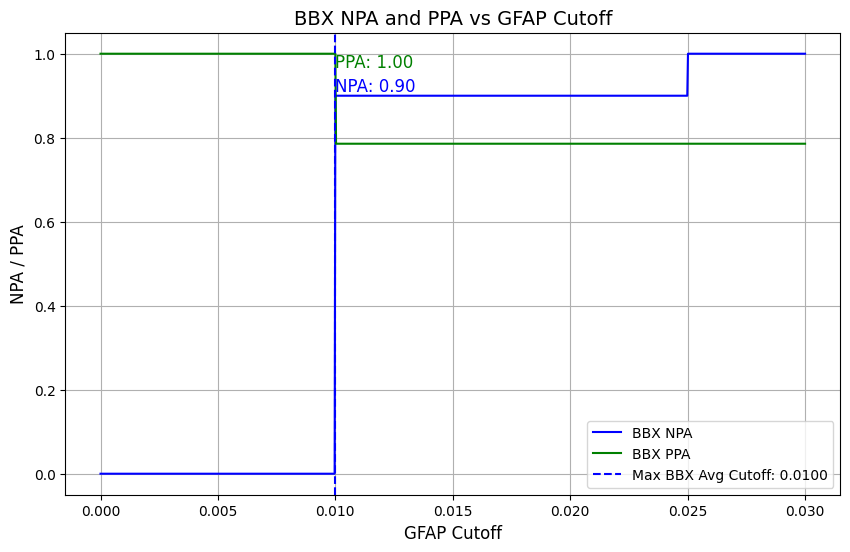

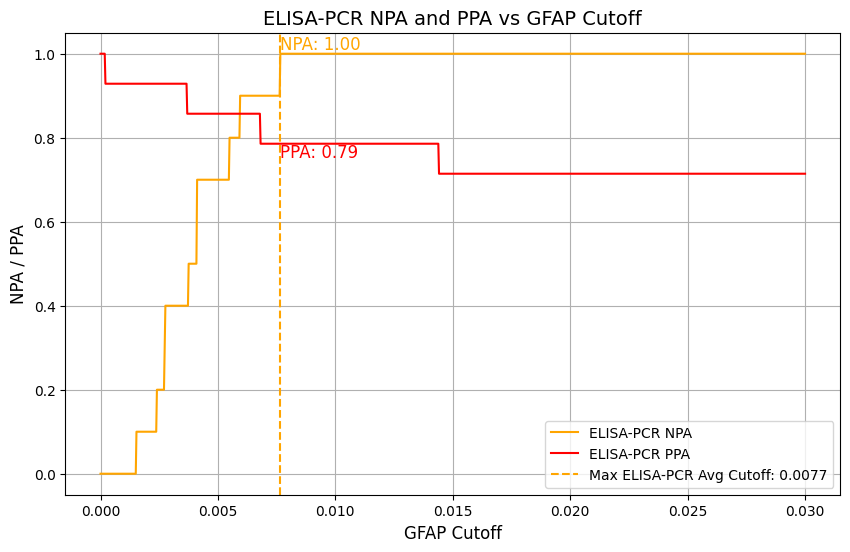

In [ ]:
# Find the cutoff value where BBX_average is the highest
max_bbx_avg_idx = gfap_npa_ppa_df['BBX_average'].idxmax()
max_bbx_cutoff = gfap_npa_ppa_df['Cutoff'].iloc[max_bbx_avg_idx]
max_bbx_npa = gfap_npa_ppa_df['BBX_NPA'].iloc[max_bbx_avg_idx]
max_bbx_ppa = gfap_npa_ppa_df['BBX_PPA'].iloc[max_bbx_avg_idx]

# Find the cutoff value where ELISA_PCR_average is the highest
max_elisa_avg_idx = gfap_npa_ppa_df['ELISA_PCR_average'].idxmax()
max_elisa_cutoff = gfap_npa_ppa_df['Cutoff'].iloc[max_elisa_avg_idx]
max_elisa_npa = gfap_npa_ppa_df['ELISA_PCR_NPA'].iloc[max_elisa_avg_idx]
max_elisa_ppa = gfap_npa_ppa_df['ELISA_PCR_PPA'].iloc[max_elisa_avg_idx]

# Plot for BBX NPA and PPA with the highlighted max average region and annotated NPA/PPA values
plt.figure(figsize=(10, 6))
plt.plot(gfap_npa_ppa_df['Cutoff'], gfap_npa_ppa_df['BBX_NPA'], label='BBX NPA', color='blue', linestyle='-')
plt.plot(gfap_npa_ppa_df['Cutoff'], gfap_npa_ppa_df['BBX_PPA'], label='BBX PPA', color='green', linestyle='-')

# Highlight the cutoff with the highest BBX average
plt.axvline(x=max_bbx_cutoff, color='blue', linestyle='--', label=f'Max BBX Avg Cutoff: {max_bbx_cutoff:.4f}')

# Annotate the NPA and PPA values at the highest average cutoff
plt.text(max_bbx_cutoff, max_bbx_npa, f'NPA: {max_bbx_npa:.2f}', color='blue', fontsize=12, verticalalignment='bottom')
plt.text(max_bbx_cutoff, max_bbx_ppa, f'PPA: {max_bbx_ppa:.2f}', color='green', fontsize=12, verticalalignment='top')

# Adding titles and labels for BBX plot
plt.title('BBX NPA and PPA vs GFAP Cutoff', fontsize=14)
plt.xlabel('GFAP Cutoff', fontsize=12)
plt.ylabel('NPA / PPA', fontsize=12)
plt.grid(True)
plt.legend()

# Show the first plot (BBX)
plt.show()

# Plot for ELISA_PCR NPA and PPA with the highlighted max average region and annotated NPA/PPA values
plt.figure(figsize=(10, 6))
plt.plot(gfap_npa_ppa_df['Cutoff'], gfap_npa_ppa_df['ELISA_PCR_NPA'], label='ELISA-PCR NPA', color='orange', linestyle='-')
plt.plot(gfap_npa_ppa_df['Cutoff'], gfap_npa_ppa_df['ELISA_PCR_PPA'], label='ELISA-PCR PPA', color='red', linestyle='-')

# Highlight the cutoff with the highest ELISA_PCR average
plt.axvline(x=max_elisa_cutoff, color='orange', linestyle='--', label=f'Max ELISA-PCR Avg Cutoff: {max_elisa_cutoff:.4f}')

# Annotate the NPA and PPA values at the highest average cutoff
plt.text(max_elisa_cutoff, max_elisa_npa, f'NPA: {max_elisa_npa:.2f}', color='orange', fontsize=12, verticalalignment='bottom')
plt.text(max_elisa_cutoff, max_elisa_ppa, f'PPA: {max_elisa_ppa:.2f}', color='red', fontsize=12, verticalalignment='top')

# Adding titles and labels for ELISA_PCR plot
plt.title('ELISA-PCR NPA and PPA vs GFAP Cutoff', fontsize=14)
plt.xlabel('GFAP Cutoff', fontsize=12)
plt.ylabel('NPA / PPA', fontsize=12)
plt.grid(True)
plt.legend()

# Show the second plot (ELISA_PCR)
plt.show()

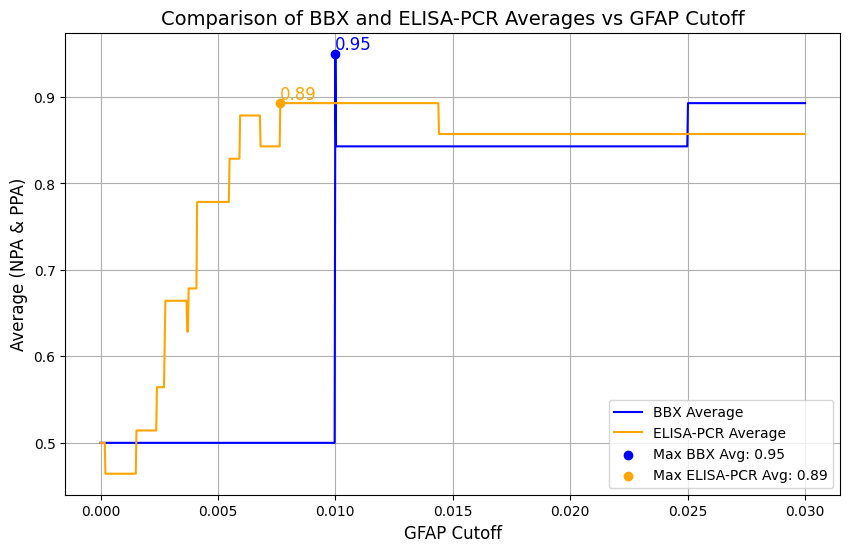

In [ ]:
# Find the cutoff values where BBX_average and ELISA_PCR_average are the highest
max_bbx_avg_idx = gfap_npa_ppa_df['BBX_average'].idxmax()
max_bbx_cutoff = gfap_npa_ppa_df['Cutoff'].iloc[max_bbx_avg_idx]
max_bbx_avg = gfap_npa_ppa_df['BBX_average'].iloc[max_bbx_avg_idx]

max_elisa_avg_idx = gfap_npa_ppa_df['ELISA_PCR_average'].idxmax()
max_elisa_cutoff = gfap_npa_ppa_df['Cutoff'].iloc[max_elisa_avg_idx]
max_elisa_avg = gfap_npa_ppa_df['ELISA_PCR_average'].iloc[max_elisa_avg_idx]

# Create a comparison plot for BBX_average and ELISA_PCR_average
plt.figure(figsize=(10, 6))

# Plot BBX_average
plt.plot(gfap_npa_ppa_df['Cutoff'], gfap_npa_ppa_df['BBX_average'], label='BBX Average', color='blue', linestyle='-')

# Plot ELISA_PCR_average
plt.plot(gfap_npa_ppa_df['Cutoff'], gfap_npa_ppa_df['ELISA_PCR_average'], label='ELISA-PCR Average', color='orange', linestyle='-')

# Highlight the maximum point for BBX_average
plt.scatter(max_bbx_cutoff, max_bbx_avg, color='blue', zorder=5, label=f'Max BBX Avg: {max_bbx_avg:.2f}')
plt.text(max_bbx_cutoff, max_bbx_avg, f'{max_bbx_avg:.2f}', color='blue', fontsize=12, verticalalignment='bottom')

# Highlight the maximum point for ELISA_PCR_average
plt.scatter(max_elisa_cutoff, max_elisa_avg, color='orange', zorder=5, label=f'Max ELISA-PCR Avg: {max_elisa_avg:.2f}')
plt.text(max_elisa_cutoff, max_elisa_avg, f'{max_elisa_avg:.2f}', color='orange', fontsize=12, verticalalignment='bottom')

# Adding titles and labels for the comparison plot
plt.title('Comparison of BBX and ELISA-PCR Averages vs GFAP Cutoff', fontsize=14)
plt.xlabel('GFAP Cutoff', fontsize=12)
plt.ylabel('Average (NPA & PPA)', fontsize=12)
plt.grid(True)
plt.legend()

# Show the comparison plot
plt.show()

In [ ]:
# Export the result list
gfap_npa_ppa_df.to_csv('gfap_data.csv', index=False)

In [ ]:
# Remove rows with missing or non-numeric data for NRGN and convert them to numeric types
nrgn_data = cleaned_data[['Sample Name', 'BBX_NRGN', 'ELISA_PCR_NRGN']].copy()
nrgn_data.loc[:, ['BBX_NRGN', 'ELISA_PCR_NRGN']] = nrgn_data[['BBX_NRGN', 'ELISA_PCR_NRGN']].replace('<', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (NaN)
nrgn_data = nrgn_data.dropna(subset=['Sample Name'])

In [ ]:
# Check the selected data
print(nrgn_data)

    Sample Name BBX_NRGN ELISA_PCR_NRGN
0   Sample name      NaN            NaN
1          D 25    0.125        0.94823
2          D 26    0.066       10.43441
3          D 27    0.096        4.68625
4          D 28    0.041        3.57475
5          D 29     0.11        2.76229
6          D 30     0.75        8.28224
7          D 31    0.063       61.82216
8          D 32    0.294        3.17469
9          D 33    0.237       16.32853
10         D 34    0.012       10.56236
11         D 35    0.044            0.0
12         D 36    0.028        0.18052
13         D 39    0.012        0.12536
14         D 40    0.012            0.0
15         D 41    0.012          0.595
17        CS 01    0.012        0.08087
18        CS 06    0.012        0.71924
19        CS 07    0.012          1.867
20        CS 08    0.012            0.0
21        CS 09    0.012            0.0
22         CS10    0.012        1.09584
23         CS12    0.053        0.30465
24         CS13    0.013          4.341


In [ ]:
# Define a range of cutoff values based on both BBX_NRGN and ELISA_PCR_NRGN from nrgn_data
# nrgn_cutoff_range = np.linspace(min(nrgn_data['BBX_NRGN'].min(), nrgn_data['ELISA_PCR_NRGN'].min()),
#    max(nrgn_data['BBX_NRGN'].max(), nrgn_data['ELISA_PCR_NRGN'].max()),
#    1000
# )
nrgn_cutoff_range = np.linspace(0, 5, 1000)

# Create separate datasets based on 'Sample Name' filtering
cs_samples = nrgn_data[nrgn_data['Sample Name'].str.startswith('CS')].copy()
d_samples = nrgn_data[nrgn_data['Sample Name'].str.startswith('D')].copy()
cs_samples = cs_samples.dropna()
d_samples = d_samples.dropna()

# Calculate the effect of different cutoffs on NPA and PPA for both BBX and ELISA_PCR for NRGN
nrgn_npa_ppa_per_cutoff = []

for cutoff in nrgn_cutoff_range:
    # BBX_NRGN:
    # NPA is the fraction of samples where BBX_NRGN <= cutoff, only considering "CS" samples
    bbx_npa = (cs_samples['BBX_NRGN'] <= cutoff).mean()

    # PPA is the fraction of samples where BBX_NRGN >= cutoff, only considering "D" samples
    bbx_ppa = (d_samples['BBX_NRGN'] >= cutoff).mean()

    # ELISA_PCR_NRGN:
    # NPA is the fraction of samples where ELISA_PCR_NRGN <= cutoff, only considering "CS" samples
    elisa_npa = (cs_samples['ELISA_PCR_NRGN'] <= cutoff).mean()

    # PPA is the fraction of samples where ELISA_PCR_NRGN >= cutoff, only considering "D" samples
    elisa_ppa = (d_samples['ELISA_PCR_NRGN'] >= cutoff).mean()

    # Calculate the averages
    bbx_avg = (bbx_npa + bbx_ppa) / 2
    elisa_avg = (elisa_npa + elisa_ppa) / 2

    # Append the results to the list
    nrgn_npa_ppa_per_cutoff.append({
        'Cutoff': cutoff,
        'BBX_NPA': bbx_npa,
        'BBX_PPA': bbx_ppa,
        'ELISA_PCR_NPA': elisa_npa,
        'ELISA_PCR_PPA': elisa_ppa,
        'BBX_average': bbx_avg,
        'ELISA_PCR_average': elisa_avg
    })

# Convert the results into a DataFrame
nrgn_npa_ppa_df = pd.DataFrame(nrgn_npa_ppa_per_cutoff)

In [ ]:
# Display the DataFrame with cutoffs and their corresponding NPA and PPA
print(nrgn_npa_ppa_df)

       Cutoff  BBX_NPA   BBX_PPA  ELISA_PCR_NPA  ELISA_PCR_PPA  BBX_average  \
0    0.000000      0.0  1.000000            0.2       1.000000     0.500000   
1    0.005005      0.0  1.000000            0.2       0.866667     0.500000   
2    0.010010      0.0  1.000000            0.2       0.866667     0.500000   
3    0.015015      0.8  0.733333            0.2       0.866667     0.766667   
4    0.020020      0.8  0.733333            0.2       0.866667     0.766667   
..        ...      ...       ...            ...            ...          ...   
995  4.979980      1.0  0.000000            1.0       0.333333     0.500000   
996  4.984985      1.0  0.000000            1.0       0.333333     0.500000   
997  4.989990      1.0  0.000000            1.0       0.333333     0.500000   
998  4.994995      1.0  0.000000            1.0       0.333333     0.500000   
999  5.000000      1.0  0.000000            1.0       0.333333     0.500000   

     ELISA_PCR_average  
0             0.600000  
1

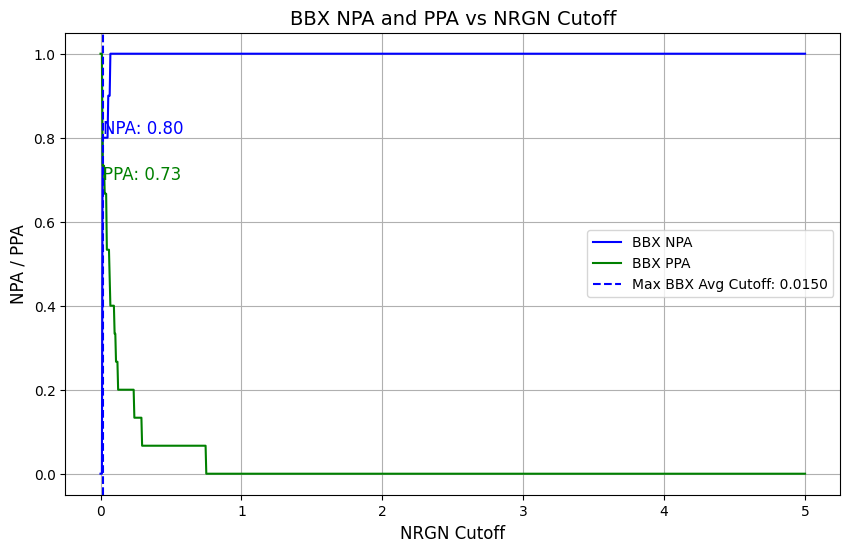

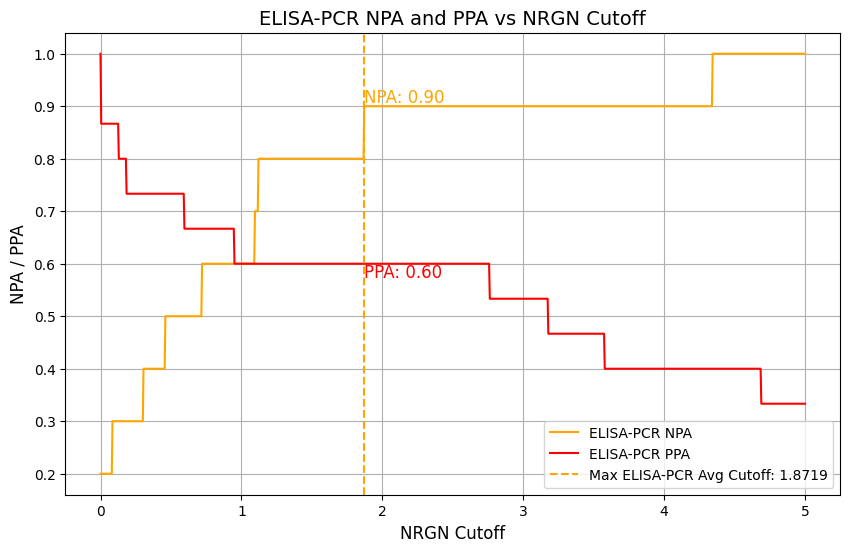

In [ ]:
# Find the cutoff value where BBX_average is the highest for NRGN
max_bbx_avg_idx = nrgn_npa_ppa_df['BBX_average'].idxmax()
max_bbx_cutoff = nrgn_npa_ppa_df['Cutoff'].iloc[max_bbx_avg_idx]
max_bbx_npa = nrgn_npa_ppa_df['BBX_NPA'].iloc[max_bbx_avg_idx]
max_bbx_ppa = nrgn_npa_ppa_df['BBX_PPA'].iloc[max_bbx_avg_idx]

# Find the cutoff value where ELISA_PCR_average is the highest for NRGN
max_elisa_avg_idx = nrgn_npa_ppa_df['ELISA_PCR_average'].idxmax()
max_elisa_cutoff = nrgn_npa_ppa_df['Cutoff'].iloc[max_elisa_avg_idx]
max_elisa_npa = nrgn_npa_ppa_df['ELISA_PCR_NPA'].iloc[max_elisa_avg_idx]
max_elisa_ppa = nrgn_npa_ppa_df['ELISA_PCR_PPA'].iloc[max_elisa_avg_idx]

# Plot for BBX NPA and PPA with the highlighted max average region and annotated NPA/PPA values
plt.figure(figsize=(10, 6))
plt.plot(nrgn_npa_ppa_df['Cutoff'], nrgn_npa_ppa_df['BBX_NPA'], label='BBX NPA', color='blue', linestyle='-')
plt.plot(nrgn_npa_ppa_df['Cutoff'], nrgn_npa_ppa_df['BBX_PPA'], label='BBX PPA', color='green', linestyle='-')

# Highlight the cutoff with the highest BBX average
plt.axvline(x=max_bbx_cutoff, color='blue', linestyle='--', label=f'Max BBX Avg Cutoff: {max_bbx_cutoff:.4f}')

# Annotate the NPA and PPA values at the highest average cutoff
plt.text(max_bbx_cutoff, max_bbx_npa, f'NPA: {max_bbx_npa:.2f}', color='blue', fontsize=12, verticalalignment='bottom')
plt.text(max_bbx_cutoff, max_bbx_ppa, f'PPA: {max_bbx_ppa:.2f}', color='green', fontsize=12, verticalalignment='top')

# Adding titles and labels for BBX plot
plt.title('BBX NPA and PPA vs NRGN Cutoff', fontsize=14)
plt.xlabel('NRGN Cutoff', fontsize=12)
plt.ylabel('NPA / PPA', fontsize=12)
plt.grid(True)
plt.legend()

# Show the first plot (BBX)
plt.show()

# Plot for ELISA_PCR NPA and PPA with the highlighted max average region and annotated NPA/PPA values
plt.figure(figsize=(10, 6))
plt.plot(nrgn_npa_ppa_df['Cutoff'], nrgn_npa_ppa_df['ELISA_PCR_NPA'], label='ELISA-PCR NPA', color='orange', linestyle='-')
plt.plot(nrgn_npa_ppa_df['Cutoff'], nrgn_npa_ppa_df['ELISA_PCR_PPA'], label='ELISA-PCR PPA', color='red', linestyle='-')

# Highlight the cutoff with the highest ELISA_PCR average
plt.axvline(x=max_elisa_cutoff, color='orange', linestyle='--', label=f'Max ELISA-PCR Avg Cutoff: {max_elisa_cutoff:.4f}')

# Annotate the NPA and PPA values at the highest average cutoff
plt.text(max_elisa_cutoff, max_elisa_npa, f'NPA: {max_elisa_npa:.2f}', color='orange', fontsize=12, verticalalignment='bottom')
plt.text(max_elisa_cutoff, max_elisa_ppa, f'PPA: {max_elisa_ppa:.2f}', color='red', fontsize=12, verticalalignment='top')

# Adding titles and labels for ELISA_PCR plot
plt.title('ELISA-PCR NPA and PPA vs NRGN Cutoff', fontsize=14)
plt.xlabel('NRGN Cutoff', fontsize=12)
plt.ylabel('NPA / PPA', fontsize=12)
plt.grid(True)
plt.legend()

# Show the second plot (ELISA_PCR)
plt.show()

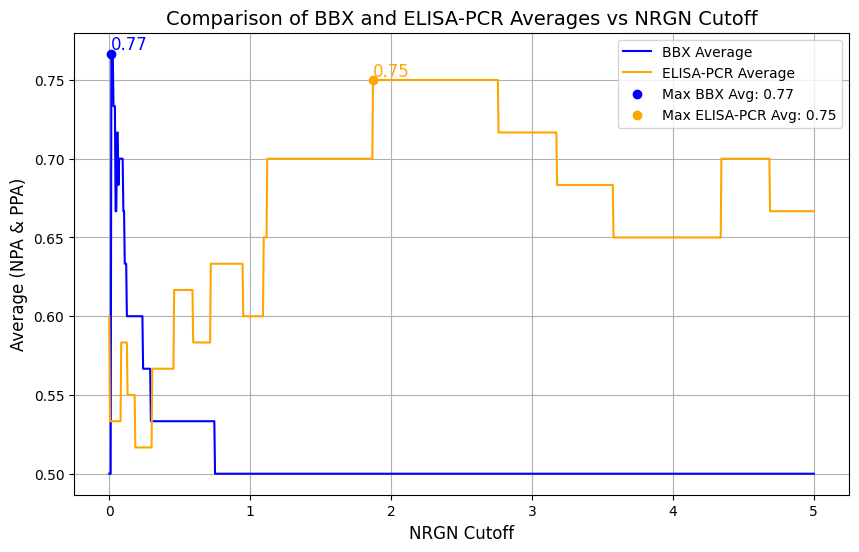

In [ ]:
# Find the cutoff values where BBX_average and ELISA_PCR_average are the highest for NRGN
max_bbx_avg_idx = nrgn_npa_ppa_df['BBX_average'].idxmax()
max_bbx_cutoff = nrgn_npa_ppa_df['Cutoff'].iloc[max_bbx_avg_idx]
max_bbx_avg = nrgn_npa_ppa_df['BBX_average'].iloc[max_bbx_avg_idx]

max_elisa_avg_idx = nrgn_npa_ppa_df['ELISA_PCR_average'].idxmax()
max_elisa_cutoff = nrgn_npa_ppa_df['Cutoff'].iloc[max_elisa_avg_idx]
max_elisa_avg = nrgn_npa_ppa_df['ELISA_PCR_average'].iloc[max_elisa_avg_idx]

# Create a comparison plot for BBX_average and ELISA_PCR_average for NRGN
plt.figure(figsize=(10, 6))

# Plot BBX_average
plt.plot(nrgn_npa_ppa_df['Cutoff'], nrgn_npa_ppa_df['BBX_average'], label='BBX Average', color='blue', linestyle='-')

# Plot ELISA_PCR_average
plt.plot(nrgn_npa_ppa_df['Cutoff'], nrgn_npa_ppa_df['ELISA_PCR_average'], label='ELISA-PCR Average', color='orange', linestyle='-')

# Highlight the maximum point for BBX_average
plt.scatter(max_bbx_cutoff, max_bbx_avg, color='blue', zorder=5, label=f'Max BBX Avg: {max_bbx_avg:.2f}')
plt.text(max_bbx_cutoff, max_bbx_avg, f'{max_bbx_avg:.2f}', color='blue', fontsize=12, verticalalignment='bottom')

# Highlight the maximum point for ELISA_PCR_average
plt.scatter(max_elisa_cutoff, max_elisa_avg, color='orange', zorder=5, label=f'Max ELISA-PCR Avg: {max_elisa_avg:.2f}')
plt.text(max_elisa_cutoff, max_elisa_avg, f'{max_elisa_avg:.2f}', color='orange', fontsize=12, verticalalignment='bottom')

# Adding titles and labels for the comparison plot
plt.title('Comparison of BBX and ELISA-PCR Averages vs NRGN Cutoff', fontsize=14)
plt.xlabel('NRGN Cutoff', fontsize=12)
plt.ylabel('Average (NPA & PPA)', fontsize=12)
plt.grid(True)
plt.legend()

# Show the comparison plot
plt.show()

In [ ]:
# Export the result list
nrgn_npa_ppa_df.to_csv('nrgn_data.csv', index=False)

In [ ]:
# Remove rows with missing or non-numeric data for ST2 and convert them to numeric types
st2_data = cleaned_data[['Sample Name', 'BBX_ST2', 'ELISA_PCR_ST2']].copy()
st2_data.loc[:, ['BBX_ST2', 'ELISA_PCR_ST2']] = st2_data[['BBX_ST2', 'ELISA_PCR_ST2']].replace('<', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Drop rows with missing 'Sample Name' values
st2_data = st2_data.dropna(subset=['Sample Name'])

In [ ]:
# Check the selected data
print(st2_data)

    Sample Name BBX_ST2 ELISA_PCR_ST2
0   Sample name     NaN           NaN
1          D 25    39.0       0.36493
2          D 26   184.0        4.5147
3          D 27    48.0      44.82302
4          D 28    45.0      13.48017
5          D 29    17.0      17.05324
6          D 30    37.0       2.04417
7          D 31    33.0       9.03415
8          D 32    18.0        5.0281
9          D 33    29.0       1.19215
10         D 34   200.0       2.72966
11         D 35    12.0       0.63388
12         D 36    25.0        4.1108
13         D 39    62.0       6.66376
14         D 40   137.0      39.10051
15         D 41    38.0      52.75857
17        CS 01     6.0       0.81514
18        CS 06    29.0       1.36626
19        CS 07    33.0       2.93504
20        CS 08    32.0           0.0
21        CS 09    19.0       0.93159
22         CS10    16.0       1.11332
23         CS12    22.0       1.32675
24         CS13    17.0       0.91621
25         CS14    31.0       0.90511
26         C

In [ ]:
# Define a range of cutoff values based on both BBX_ST2 and ELISA_PCR_ST2 from st2_data
# st2_cutoff_range = np.linspace(
#     min(st2_data['BBX_ST2'].min(), st2_data['ELISA_PCR_ST2'].min()),
#     max(st2_data['BBX_ST2'].max(), st2_data['ELISA_PCR_ST2'].max()),
#     5000
# )
st2_cutoff_range = np.linspace(0, 50, 1000)

# Create separate datasets based on 'Sample Name' filtering
cs_samples = st2_data[st2_data['Sample Name'].str.startswith('CS')].copy()
d_samples = st2_data[st2_data['Sample Name'].str.startswith('D')].copy()
cs_samples = cs_samples.dropna()
d_samples = d_samples.dropna()

# Calculate the effect of different cutoffs on NPA and PPA for both BBX and ELISA_PCR for ST2
st2_npa_ppa_per_cutoff = []

for cutoff in st2_cutoff_range:
    # BBX_ST2:
    # NPA is the fraction of samples where BBX_ST2 <= cutoff, only considering "CS" samples
    bbx_npa = (cs_samples['BBX_ST2'] <= cutoff).mean()

    # PPA is the fraction of samples where BBX_ST2 >= cutoff, only considering "D" samples
    bbx_ppa = (d_samples['BBX_ST2'] >= cutoff).mean()

    # ELISA_PCR_ST2:
    # NPA is the fraction of samples where ELISA_PCR_ST2 <= cutoff, only considering "CS" samples
    elisa_npa = (cs_samples['ELISA_PCR_ST2'] <= cutoff).mean()

    # PPA is the fraction of samples where ELISA_PCR_ST2 >= cutoff, only considering "D" samples
    elisa_ppa = (d_samples['ELISA_PCR_ST2'] >= cutoff).mean()

    # Calculate the averages
    bbx_avg = (bbx_npa + bbx_ppa) / 2
    elisa_avg = (elisa_npa + elisa_ppa) / 2

    # Append the results to the list
    st2_npa_ppa_per_cutoff.append({
        'Cutoff': cutoff,
        'BBX_NPA': bbx_npa,
        'BBX_PPA': bbx_ppa,
        'ELISA_PCR_NPA': elisa_npa,
        'ELISA_PCR_PPA': elisa_ppa,
        'BBX_average': bbx_avg,
        'ELISA_PCR_average': elisa_avg
    })

# Convert the results into a DataFrame
st2_npa_ppa_df = pd.DataFrame(st2_npa_ppa_per_cutoff)

In [ ]:
# Display the DataFrame with cutoffs and their corresponding NPA and PPA
print(st2_npa_ppa_df)

       Cutoff  BBX_NPA   BBX_PPA  ELISA_PCR_NPA  ELISA_PCR_PPA  BBX_average  \
0     0.00000      0.0  1.000000            0.1       1.000000     0.500000   
1     0.05005      0.0  1.000000            0.1       1.000000     0.500000   
2     0.10010      0.0  1.000000            0.1       1.000000     0.500000   
3     0.15015      0.0  1.000000            0.1       1.000000     0.500000   
4     0.20020      0.0  1.000000            0.1       1.000000     0.500000   
..        ...      ...       ...            ...            ...          ...   
995  49.79980      1.0  0.266667            1.0       0.066667     0.633333   
996  49.84985      1.0  0.266667            1.0       0.066667     0.633333   
997  49.89990      1.0  0.266667            1.0       0.066667     0.633333   
998  49.94995      1.0  0.266667            1.0       0.066667     0.633333   
999  50.00000      1.0  0.266667            1.0       0.066667     0.633333   

     ELISA_PCR_average  
0             0.550000  
1

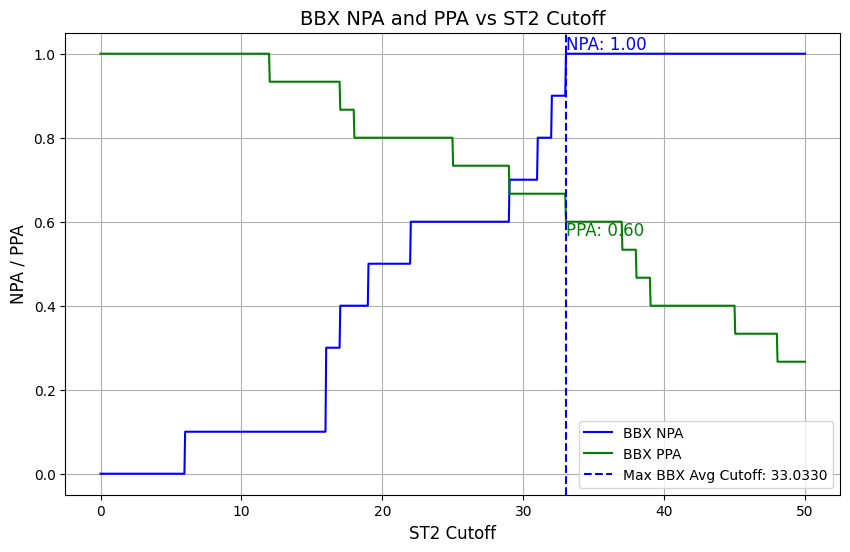

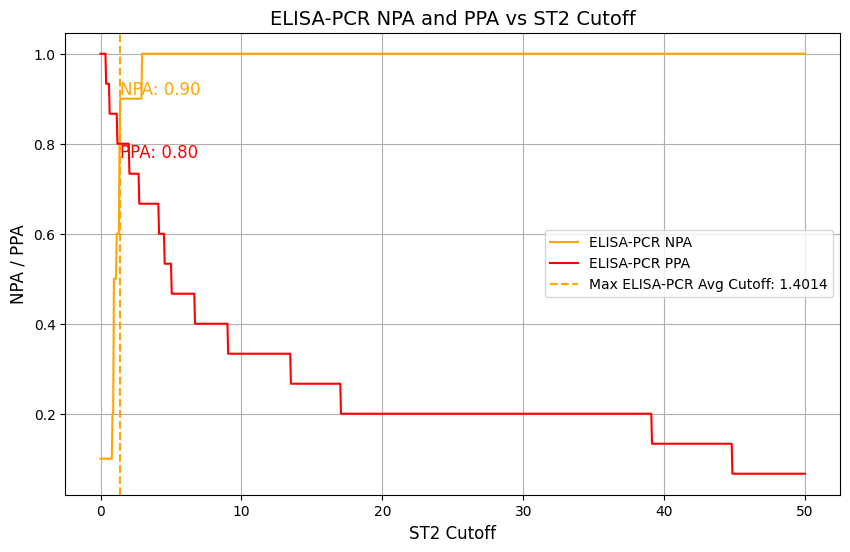

In [ ]:
# Find the cutoff value where BBX_average is the highest for ST2
max_bbx_avg_idx = st2_npa_ppa_df['BBX_average'].idxmax()
max_bbx_cutoff = st2_npa_ppa_df['Cutoff'].iloc[max_bbx_avg_idx]
max_bbx_npa = st2_npa_ppa_df['BBX_NPA'].iloc[max_bbx_avg_idx]
max_bbx_ppa = st2_npa_ppa_df['BBX_PPA'].iloc[max_bbx_avg_idx]

# Find the cutoff value where ELISA_PCR_average is the highest for ST2
max_elisa_avg_idx = st2_npa_ppa_df['ELISA_PCR_average'].idxmax()
max_elisa_cutoff = st2_npa_ppa_df['Cutoff'].iloc[max_elisa_avg_idx]
max_elisa_npa = st2_npa_ppa_df['ELISA_PCR_NPA'].iloc[max_elisa_avg_idx]
max_elisa_ppa = st2_npa_ppa_df['ELISA_PCR_PPA'].iloc[max_elisa_avg_idx]

# Plot for BBX NPA and PPA with the highlighted max average region and annotated NPA/PPA values
plt.figure(figsize=(10, 6))
plt.plot(st2_npa_ppa_df['Cutoff'], st2_npa_ppa_df['BBX_NPA'], label='BBX NPA', color='blue', linestyle='-')
plt.plot(st2_npa_ppa_df['Cutoff'], st2_npa_ppa_df['BBX_PPA'], label='BBX PPA', color='green', linestyle='-')

# Highlight the cutoff with the highest BBX average
plt.axvline(x=max_bbx_cutoff, color='blue', linestyle='--', label=f'Max BBX Avg Cutoff: {max_bbx_cutoff:.4f}')

# Annotate the NPA and PPA values at the highest average cutoff
plt.text(max_bbx_cutoff, max_bbx_npa, f'NPA: {max_bbx_npa:.2f}', color='blue', fontsize=12, verticalalignment='bottom')
plt.text(max_bbx_cutoff, max_bbx_ppa, f'PPA: {max_bbx_ppa:.2f}', color='green', fontsize=12, verticalalignment='top')

# Adding titles and labels for BBX plot
plt.title('BBX NPA and PPA vs ST2 Cutoff', fontsize=14)
plt.xlabel('ST2 Cutoff', fontsize=12)
plt.ylabel('NPA / PPA', fontsize=12)
plt.grid(True)
plt.legend()

# Show the first plot (BBX)
plt.show()

# Plot for ELISA_PCR NPA and PPA with the highlighted max average region and annotated NPA/PPA values
plt.figure(figsize=(10, 6))
plt.plot(st2_npa_ppa_df['Cutoff'], st2_npa_ppa_df['ELISA_PCR_NPA'], label='ELISA-PCR NPA', color='orange', linestyle='-')
plt.plot(st2_npa_ppa_df['Cutoff'], st2_npa_ppa_df['ELISA_PCR_PPA'], label='ELISA-PCR PPA', color='red', linestyle='-')

# Highlight the cutoff with the highest ELISA_PCR average
plt.axvline(x=max_elisa_cutoff, color='orange', linestyle='--', label=f'Max ELISA-PCR Avg Cutoff: {max_elisa_cutoff:.4f}')

# Annotate the NPA and PPA values at the highest average cutoff
plt.text(max_elisa_cutoff, max_elisa_npa, f'NPA: {max_elisa_npa:.2f}', color='orange', fontsize=12, verticalalignment='bottom')
plt.text(max_elisa_cutoff, max_elisa_ppa, f'PPA: {max_elisa_ppa:.2f}', color='red', fontsize=12, verticalalignment='top')

# Adding titles and labels for ELISA_PCR plot
plt.title('ELISA-PCR NPA and PPA vs ST2 Cutoff', fontsize=14)
plt.xlabel('ST2 Cutoff', fontsize=12)
plt.ylabel('NPA / PPA', fontsize=12)
plt.grid(True)
plt.legend()

# Show the second plot (ELISA_PCR)
plt.show()

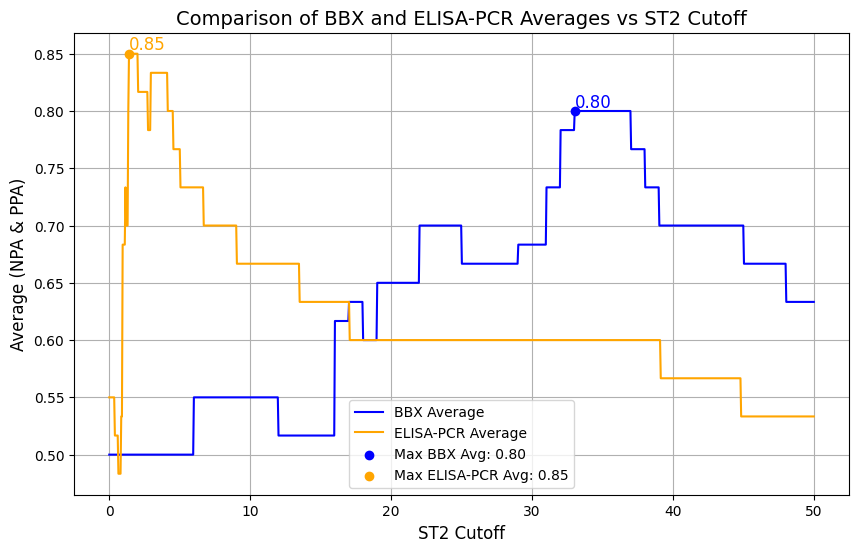

In [ ]:
# Find the cutoff values where BBX_average and ELISA_PCR_average are the highest for ST2
max_bbx_avg_idx = st2_npa_ppa_df['BBX_average'].idxmax()
max_bbx_cutoff = st2_npa_ppa_df['Cutoff'].iloc[max_bbx_avg_idx]
max_bbx_avg = st2_npa_ppa_df['BBX_average'].iloc[max_bbx_avg_idx]

max_elisa_avg_idx = st2_npa_ppa_df['ELISA_PCR_average'].idxmax()
max_elisa_cutoff = st2_npa_ppa_df['Cutoff'].iloc[max_elisa_avg_idx]
max_elisa_avg = st2_npa_ppa_df['ELISA_PCR_average'].iloc[max_elisa_avg_idx]

# Create a comparison plot for BBX_average and ELISA_PCR_average for ST2
plt.figure(figsize=(10, 6))

# Plot BBX_average
plt.plot(st2_npa_ppa_df['Cutoff'], st2_npa_ppa_df['BBX_average'], label='BBX Average', color='blue', linestyle='-')

# Plot ELISA_PCR_average
plt.plot(st2_npa_ppa_df['Cutoff'], st2_npa_ppa_df['ELISA_PCR_average'], label='ELISA-PCR Average', color='orange', linestyle='-')

# Highlight the maximum point for BBX_average
plt.scatter(max_bbx_cutoff, max_bbx_avg, color='blue', zorder=5, label=f'Max BBX Avg: {max_bbx_avg:.2f}')
plt.text(max_bbx_cutoff, max_bbx_avg, f'{max_bbx_avg:.2f}', color='blue', fontsize=12, verticalalignment='bottom')

# Highlight the maximum point for ELISA_PCR_average
plt.scatter(max_elisa_cutoff, max_elisa_avg, color='orange', zorder=5, label=f'Max ELISA-PCR Avg: {max_elisa_avg:.2f}')
plt.text(max_elisa_cutoff, max_elisa_avg, f'{max_elisa_avg:.2f}', color='orange', fontsize=12, verticalalignment='bottom')

# Adding titles and labels for the comparison plot
plt.title('Comparison of BBX and ELISA-PCR Averages vs ST2 Cutoff', fontsize=14)
plt.xlabel('ST2 Cutoff', fontsize=12)
plt.ylabel('Average (NPA & PPA)', fontsize=12)
plt.grid(True)
plt.legend()

# Show the comparison plot
plt.show()

In [ ]:
# Export the result list
st2_npa_ppa_df.to_csv('st2_data.csv', index=False)

In [ ]:
# Remove rows with missing or non-numeric data for BDNF and convert them to numeric types
bdnf_data = cleaned_data[['Sample Name', 'BBX_BDNF', 'ELISA_PCR_BDNF']].copy()
bdnf_data.loc[:, ['BBX_BDNF', 'ELISA_PCR_BDNF']] = bdnf_data[['BBX_BDNF', 'ELISA_PCR_BDNF']].replace('<', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Drop rows with missing 'Sample Name' values
bdnf_data = bdnf_data.dropna(subset=['Sample Name'])

In [ ]:
# Check the selected data
print(bdnf_data)

    Sample Name BBX_BDNF ELISA_PCR_BDNF
0   Sample name      NaN            NaN
1          D 25     25.0       7.223033
2          D 26     15.0       7.478055
3          D 27     21.0       7.267844
4          D 28     14.0       7.274194
5          D 29     20.0       7.336714
6          D 30     21.0       4.407805
7          D 31     18.0       4.962401
8          D 32     23.0       4.098916
9          D 33     16.0       2.594596
10         D 34      6.0       0.016009
11         D 35     25.0       6.226876
12         D 36     20.0       5.270332
13         D 39     62.0       3.855456
14         D 40    137.0       5.341942
15         D 41     38.0            NaN
17        CS 01      6.0       1.579039
18        CS 06      2.0       0.086213
19        CS 07      1.0       0.234387
20        CS 08      1.0       0.195661
21        CS 09      2.0       0.209963
22         CS10      1.0       0.143136
23         CS12      3.0       0.167763
24         CS13      1.0       0.152556


In [ ]:
# Define a range of cutoff values based on both BBX_BDNF and ELISA_PCR_BDNF from bdnf_data
# bdnf_cutoff_range = np.linspace(
#     min(bdnf_data['BBX_BDNF'].min(), bdnf_data['ELISA_PCR_BDNF'].min()),
#     max(bdnf_data['BBX_BDNF'].max(), bdnf_data['ELISA_PCR_BDNF'].max()),
#     1000
# )
bdnf_cutoff_range = np.linspace(0, 20, 1000)

# Create separate datasets based on 'Sample Name' filtering
cs_samples = bdnf_data[bdnf_data['Sample Name'].str.startswith('CS')].copy()
d_samples = bdnf_data[bdnf_data['Sample Name'].str.startswith('D')].copy()
cs_samples = cs_samples.dropna()
d_samples = d_samples.dropna()

# Calculate the effect of different cutoffs on NPA and PPA for both BBX and ELISA_PCR for BDNF
bdnf_npa_ppa_per_cutoff = []

for cutoff in bdnf_cutoff_range:
    # BBX_BDNF:
    # NPA is the fraction of samples where BBX_BDNF <= cutoff, only considering "CS" samples
    bbx_npa = (cs_samples['BBX_BDNF'] <= cutoff).mean()

    # PPA is the fraction of samples where BBX_BDNF >= cutoff, only considering "D" samples
    bbx_ppa = (d_samples['BBX_BDNF'] >= cutoff).mean()

    # ELISA_PCR_BDNF:
    # NPA is the fraction of samples where ELISA_PCR_BDNF <= cutoff, only considering "CS" samples
    elisa_npa = (cs_samples['ELISA_PCR_BDNF'] <= cutoff).mean()

    # PPA is the fraction of samples where ELISA_PCR_BDNF >= cutoff, only considering "D" samples
    elisa_ppa = (d_samples['ELISA_PCR_BDNF'] >= cutoff).mean()

    # Calculate the averages
    bbx_avg = (bbx_npa + bbx_ppa) / 2
    elisa_avg = (elisa_npa + elisa_ppa) / 2

    # Append the results to the list
    bdnf_npa_ppa_per_cutoff.append({
        'Cutoff': cutoff,
        'BBX_NPA': bbx_npa,
        'BBX_PPA': bbx_ppa,
        'ELISA_PCR_NPA': elisa_npa,
        'ELISA_PCR_PPA': elisa_ppa,
        'BBX_average': bbx_avg,
        'ELISA_PCR_average': elisa_avg
    })

# Convert the results into a DataFrame
bdnf_npa_ppa_df = pd.DataFrame(bdnf_npa_ppa_per_cutoff)

In [ ]:
# Display the DataFrame with cutoffs and their corresponding NPA and PPA
print(bdnf_npa_ppa_df)

       Cutoff  BBX_NPA   BBX_PPA  ELISA_PCR_NPA  ELISA_PCR_PPA  BBX_average  \
0     0.00000      0.0  1.000000            0.0       1.000000     0.500000   
1     0.02002      0.0  1.000000            0.0       0.928571     0.500000   
2     0.04004      0.0  1.000000            0.0       0.928571     0.500000   
3     0.06006      0.0  1.000000            0.0       0.928571     0.500000   
4     0.08008      0.0  1.000000            0.0       0.928571     0.500000   
..        ...      ...       ...            ...            ...          ...   
995  19.91992      1.0  0.642857            1.0       0.000000     0.821429   
996  19.93994      1.0  0.642857            1.0       0.000000     0.821429   
997  19.95996      1.0  0.642857            1.0       0.000000     0.821429   
998  19.97998      1.0  0.642857            1.0       0.000000     0.821429   
999  20.00000      1.0  0.642857            1.0       0.000000     0.821429   

     ELISA_PCR_average  
0             0.500000  
1

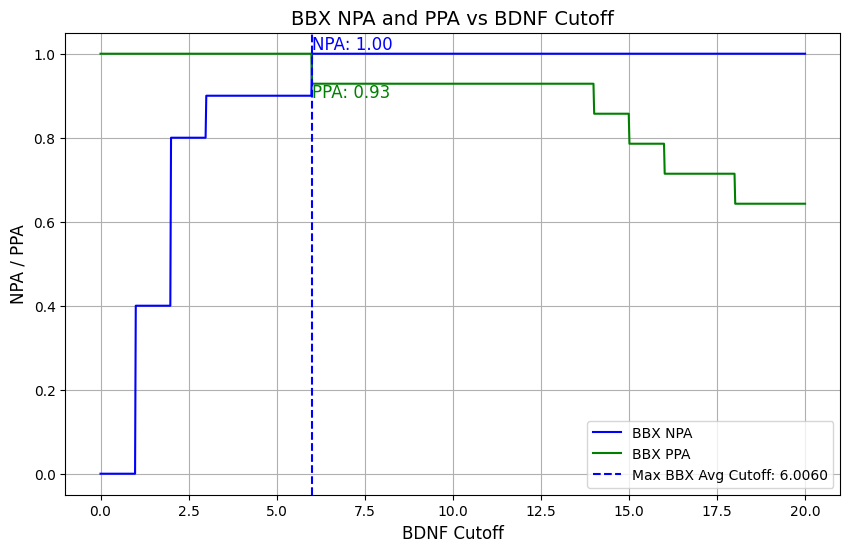

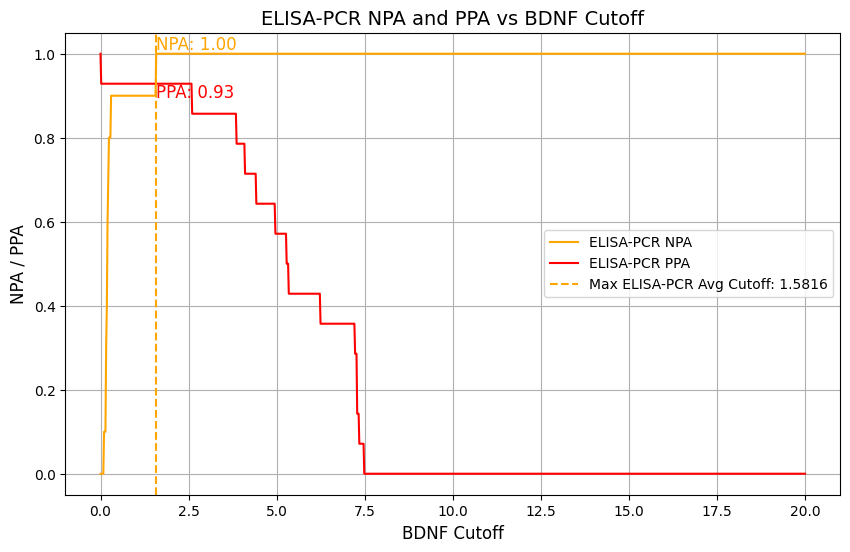

In [ ]:
# Find the cutoff value where BBX_average is the highest for BDNF
max_bbx_avg_idx = bdnf_npa_ppa_df['BBX_average'].idxmax()
max_bbx_cutoff = bdnf_npa_ppa_df['Cutoff'].iloc[max_bbx_avg_idx]
max_bbx_npa = bdnf_npa_ppa_df['BBX_NPA'].iloc[max_bbx_avg_idx]
max_bbx_ppa = bdnf_npa_ppa_df['BBX_PPA'].iloc[max_bbx_avg_idx]

# Find the cutoff value where ELISA_PCR_average is the highest for BDNF
max_elisa_avg_idx = bdnf_npa_ppa_df['ELISA_PCR_average'].idxmax()
max_elisa_cutoff = bdnf_npa_ppa_df['Cutoff'].iloc[max_elisa_avg_idx]
max_elisa_npa = bdnf_npa_ppa_df['ELISA_PCR_NPA'].iloc[max_elisa_avg_idx]
max_elisa_ppa = bdnf_npa_ppa_df['ELISA_PCR_PPA'].iloc[max_elisa_avg_idx]

# Plot for BBX NPA and PPA with the highlighted max average region and annotated NPA/PPA values
plt.figure(figsize=(10, 6))
plt.plot(bdnf_npa_ppa_df['Cutoff'], bdnf_npa_ppa_df['BBX_NPA'], label='BBX NPA', color='blue', linestyle='-')
plt.plot(bdnf_npa_ppa_df['Cutoff'], bdnf_npa_ppa_df['BBX_PPA'], label='BBX PPA', color='green', linestyle='-')

# Highlight the cutoff with the highest BBX average
plt.axvline(x=max_bbx_cutoff, color='blue', linestyle='--', label=f'Max BBX Avg Cutoff: {max_bbx_cutoff:.4f}')

# Annotate the NPA and PPA values at the highest average cutoff
plt.text(max_bbx_cutoff, max_bbx_npa, f'NPA: {max_bbx_npa:.2f}', color='blue', fontsize=12, verticalalignment='bottom')
plt.text(max_bbx_cutoff, max_bbx_ppa, f'PPA: {max_bbx_ppa:.2f}', color='green', fontsize=12, verticalalignment='top')

# Adding titles and labels for BBX plot
plt.title('BBX NPA and PPA vs BDNF Cutoff', fontsize=14)
plt.xlabel('BDNF Cutoff', fontsize=12)
plt.ylabel('NPA / PPA', fontsize=12)
plt.grid(True)
plt.legend()

# Show the first plot (BBX)
plt.show()

# Plot for ELISA_PCR NPA and PPA with the highlighted max average region and annotated NPA/PPA values
plt.figure(figsize=(10, 6))
plt.plot(bdnf_npa_ppa_df['Cutoff'], bdnf_npa_ppa_df['ELISA_PCR_NPA'], label='ELISA-PCR NPA', color='orange', linestyle='-')
plt.plot(bdnf_npa_ppa_df['Cutoff'], bdnf_npa_ppa_df['ELISA_PCR_PPA'], label='ELISA-PCR PPA', color='red', linestyle='-')

# Highlight the cutoff with the highest ELISA_PCR average
plt.axvline(x=max_elisa_cutoff, color='orange', linestyle='--', label=f'Max ELISA-PCR Avg Cutoff: {max_elisa_cutoff:.4f}')

# Annotate the NPA and PPA values at the highest average cutoff
plt.text(max_elisa_cutoff, max_elisa_npa, f'NPA: {max_elisa_npa:.2f}', color='orange', fontsize=12, verticalalignment='bottom')
plt.text(max_elisa_cutoff, max_elisa_ppa, f'PPA: {max_elisa_ppa:.2f}', color='red', fontsize=12, verticalalignment='top')

# Adding titles and labels for ELISA_PCR plot
plt.title('ELISA-PCR NPA and PPA vs BDNF Cutoff', fontsize=14)
plt.xlabel('BDNF Cutoff', fontsize=12)
plt.ylabel('NPA / PPA', fontsize=12)
plt.grid(True)
plt.legend()

# Show the second plot (ELISA_PCR)
plt.show()

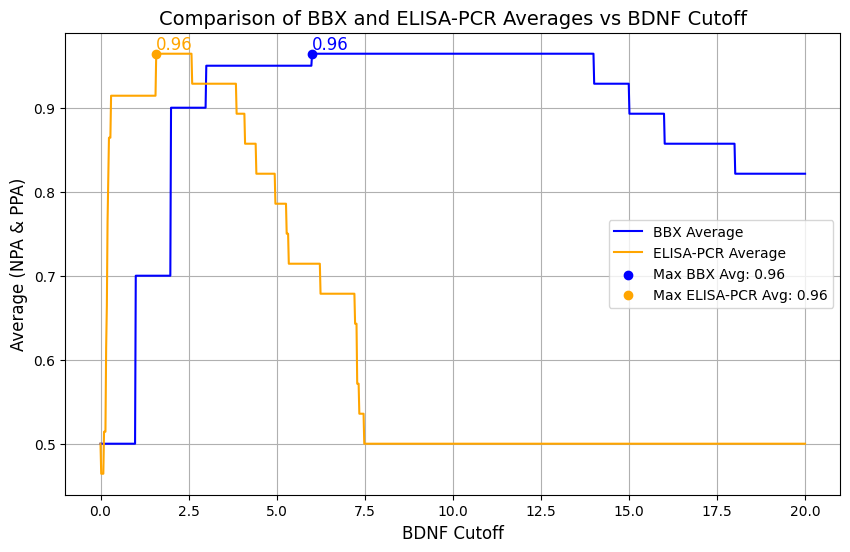

In [ ]:
# Find the cutoff values where BBX_average and ELISA_PCR_average are the highest for BDNF
max_bbx_avg_idx = bdnf_npa_ppa_df['BBX_average'].idxmax()
max_bbx_cutoff = bdnf_npa_ppa_df['Cutoff'].iloc[max_bbx_avg_idx]
max_bbx_avg = bdnf_npa_ppa_df['BBX_average'].iloc[max_bbx_avg_idx]

max_elisa_avg_idx = bdnf_npa_ppa_df['ELISA_PCR_average'].idxmax()
max_elisa_cutoff = bdnf_npa_ppa_df['Cutoff'].iloc[max_elisa_avg_idx]
max_elisa_avg = bdnf_npa_ppa_df['ELISA_PCR_average'].iloc[max_elisa_avg_idx]

# Create a comparison plot for BBX_average and ELISA_PCR_average for BDNF
plt.figure(figsize=(10, 6))

# Plot BBX_average
plt.plot(bdnf_npa_ppa_df['Cutoff'], bdnf_npa_ppa_df['BBX_average'], label='BBX Average', color='blue', linestyle='-')

# Plot ELISA_PCR_average
plt.plot(bdnf_npa_ppa_df['Cutoff'], bdnf_npa_ppa_df['ELISA_PCR_average'], label='ELISA-PCR Average', color='orange', linestyle='-')

# Highlight the maximum point for BBX_average
plt.scatter(max_bbx_cutoff, max_bbx_avg, color='blue', zorder=5, label=f'Max BBX Avg: {max_bbx_avg:.2f}')
plt.text(max_bbx_cutoff, max_bbx_avg, f'{max_bbx_avg:.2f}', color='blue', fontsize=12, verticalalignment='bottom')

# Highlight the maximum point for ELISA_PCR_average
plt.scatter(max_elisa_cutoff, max_elisa_avg, color='orange', zorder=5, label=f'Max ELISA-PCR Avg: {max_elisa_avg:.2f}')
plt.text(max_elisa_cutoff, max_elisa_avg, f'{max_elisa_avg:.2f}', color='orange', fontsize=12, verticalalignment='bottom')

# Adding titles and labels for the comparison plot
plt.title('Comparison of BBX and ELISA-PCR Averages vs BDNF Cutoff', fontsize=14)
plt.xlabel('BDNF Cutoff', fontsize=12)
plt.ylabel('Average (NPA & PPA)', fontsize=12)
plt.grid(True)
plt.legend()

# Show the comparison plot
plt.show()

In [ ]:
# Export the result list
bdnf_npa_ppa_df.to_csv('bdnf_data.csv', index=False)